# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [1]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from scipy import signal

import sys
import utils

In [2]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook  
import matplotlib.pyplot as plt

In [89]:
# im1_file = datadir + 'nutmeg.jpg'
# im2_file = datadir + 'DerekPicture.jpg'
# im1_file = './img/LecExample/Nutmeg.jpg'
# im2_file = './img/LecExample/DerekPicture.jpg'

im1_file = './img/set1/lama.jpg'
im2_file = './img/set1/owl.jpg'
# im1_file = './img/extra/1_wolf.jpg'
# im2_file = './img/extra/1_geralt.jpeg'
# im1_file = './img/extra/2_owl.jpeg'
# im2_file = './img/extra/2_cat.jpg'
im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im21 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im22 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)
# print(im21)

In [91]:
pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>

In [93]:
pts_im2 = utils.prompt_eye_selection(im2)
# pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

<IPython.core.display.Javascript object>

In [94]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [95]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

In [96]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


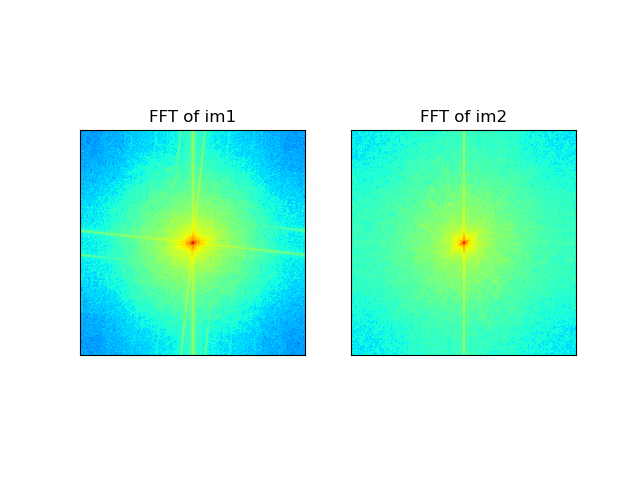

In [98]:
#Get FFT magnitude of im1 and im2
fftmag1 = np.abs(np.fft.fftshift(np.fft.fft2(im1)))

fftmag2 = np.abs(np.fft.fftshift(np.fft.fft2(im2)))


fig, axes = plt.subplots(1, 2)
#fft display here
axes[0].imshow(fftmag1,norm=LogNorm(fftmag1.min(),fftmag1.max()),cmap='jet')
axes[0].set_title('FFT of im1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(fftmag2,norm=LogNorm(fftmag2.min(),fftmag2.max()),cmap='jet')
axes[1].set_title('FFT of im2'), axes[1].set_xticks([]), axes[1].set_yticks([]);
plt.savefig('./img/set1/fft1')  
# plt.savefig('./img/set1/fft2')   

In [66]:
#we get a gaussian filter here, for low pass
sigmaVal = 40
def getGaussian(sigma):
    #sigma decides how large is the kernel
    ksize = np.int(np.ceil(sigma)*6+1)
    gaussianFilter = cv2.getGaussianKernel(ksize, sigma) # 1D kernel
    gaussianFilter = gaussianFilter*np.transpose(gaussianFilter) # 2D kernel by outer product
    return gaussianFilter



# fig, axes = plt.subplots(1, 2)
# axes[0].imshow(getGaussian(sigmaVal),cmap='gray')
# axes[0].set_title('gaussianFilter'), axes[0].set_xticks([]), axes[0].set_yticks([])



#for high pass, use impulse filter minus gaussian

# impluse = signal.unit_impulse(gaussianFilter.shape, 'mid')

lowPass =  getGaussian(sigmaVal/10)
# axes[1].imshow(lowPass,cmap='gray')
# axes[1].set_title('low pass'), axes[1].set_xticks([]), axes[1].set_yticks([]);




In [56]:
def hybridImage(im1, im2, sigma_low, sigma_high):
  
    Filter_cutlow = getGaussian(sigma_low)
    Filter_cuthigh = getGaussian(sigma_high)

    im_fil1 = cv2.filter2D(im1, -1, Filter_cutlow)
    plt.figure()
    plt.imshow(im_fil1, cmap='gray')
#     plt.savefig('./img/set1/im_fil1')

    im_fil2 = im2 - cv2.filter2D(im2, -1, Filter_cuthigh)
    plt.figure()
    plt.imshow(im_fil2,cmap='gray')
#     plt.savefig('./img/set1/im_fil2')

    

    fftmag1 = np.abs(np.fft.fftshift(np.fft.fft2(im_fil1)))
    plt.figure()
    plt.imshow(fftmag1, norm=LogNorm(1, 30))
#     plt.savefig('./img/set1/fftmag1')

    
    fftmag2 = np.abs(np.fft.fftshift(np.fft.fft2(im_fil2)))
    plt.figure()
    plt.imshow(fftmag2, norm=LogNorm(1, 30))
#     plt.savefig('./img/set1/fftmag2')



    res = (im_fil1 + im_fil2)/2
    plt.figure()
    plt.imshow(res,cmap='gray')
#     plt.savefig('./img/set1/res')
#     plt.savefig('./img/extra/extraRes2')

    fftres = np.abs(np.fft.fftshift(np.fft.fft2(res)))
    plt.figure()
    plt.imshow(fftres,norm=LogNorm(1, 30))
#     plt.savefig('./img/set1/fftres')
    
    return res

<IPython.core.display.Javascript object>


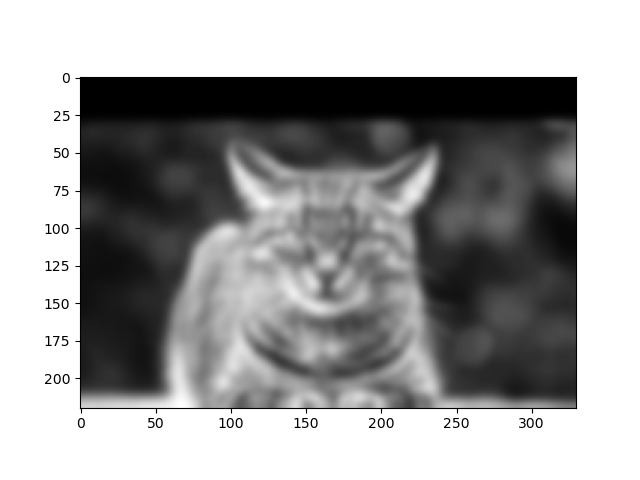

<IPython.core.display.Javascript object>


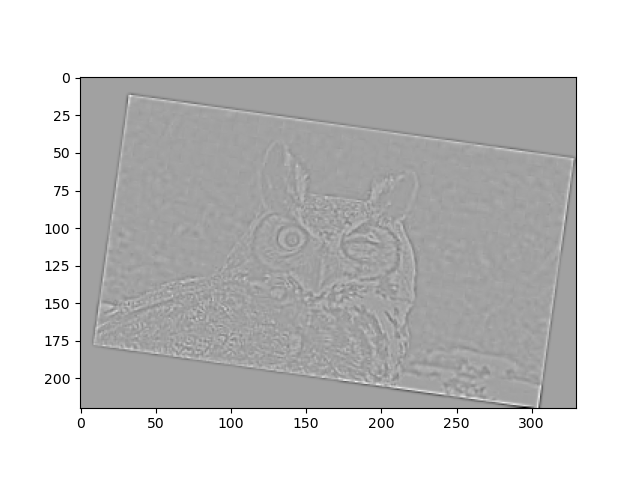

<IPython.core.display.Javascript object>


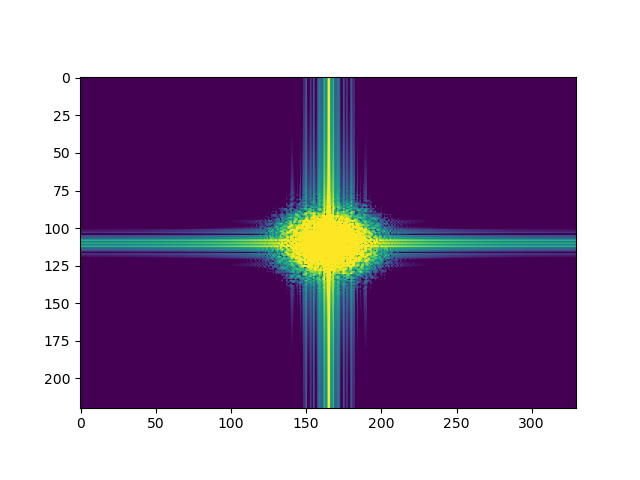

<IPython.core.display.Javascript object>


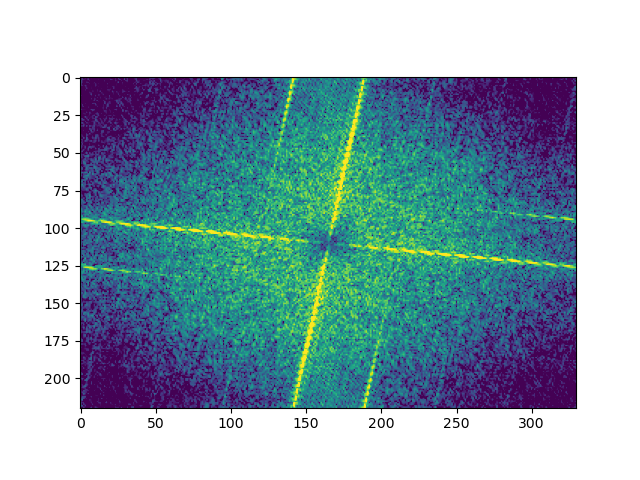

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


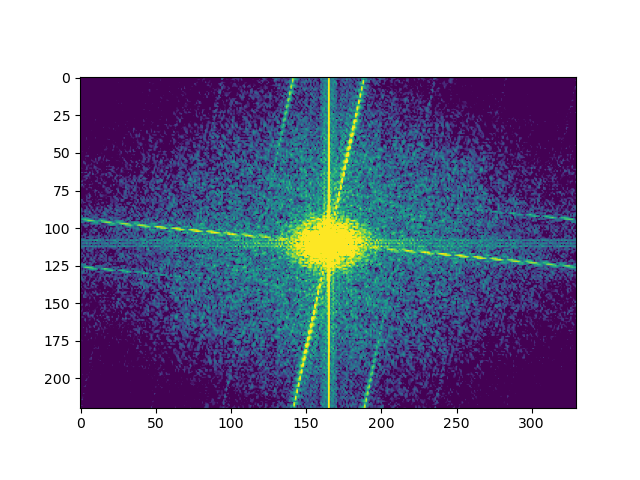

In [84]:
sigma_low = 3 # choose parameters that work for your images
sigma_high = 1

res = hybridImage(im2, im1, sigma_low, sigma_high)



In [85]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(res)

<IPython.core.display.Javascript object>

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

<IPython.core.display.Javascript object>


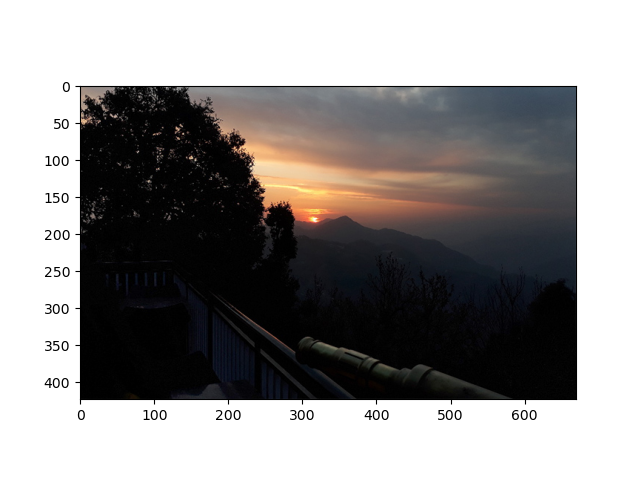

<IPython.core.display.Javascript object>

In [46]:
im_origin = cv2.imread('./img/part2/img2_1.jpg', 1) 
#histogram equalization
#credit to 
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html
#stack overflow
#https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image

# RGB to HSV
img_hsv = cv2.cvtColor(im_origin, cv2.COLOR_RGB2HSV)

img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])#Hue, Saturation, and Value, so 2 is v
#HSV to RGB
im_after = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
im_after = im_after[:, :, [2,1,0]]# maps BGR to RGB


im_origin = im_origin[:, :, [2,1,0]]
plt.figure()
plt.imshow(im_origin, norm=LogNorm(1, 30))
plt.savefig('./img/part2/im_origin')


plt.figure()
plt.imshow(im_after, norm=LogNorm(1, 30))
plt.savefig('./img/part2/im_after')


# axes[0].imshow(im_origin,norm=LogNorm(im_origin.min(),im_origin.max()),cmap='jet')
# axes[0].set_title('im_origin'), axes[0].set_xticks([]), axes[0].set_yticks([])
# axes[1].imshow(im_after,norm=LogNorm(im_after.min(),im_after.max()),cmap='jet')
# axes[1].set_title('im_origin'), axes[0].set_xticks([]), axes[0].set_yticks([])





# plt.imshow(res)  
# plt.imshow(im_after)  






#### Color enhancement 

<IPython.core.display.Javascript object>


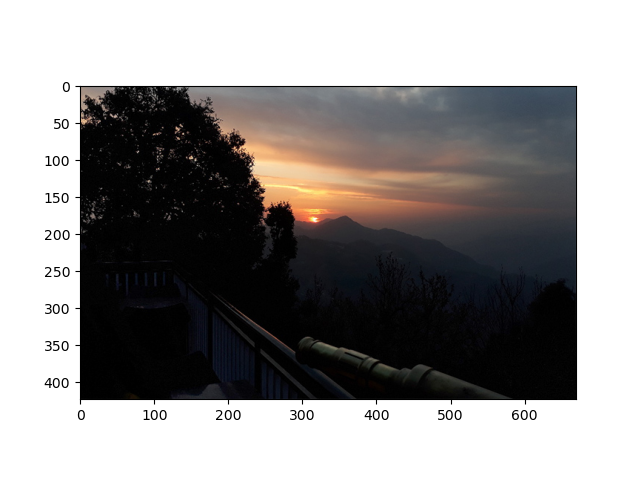

<IPython.core.display.Javascript object>


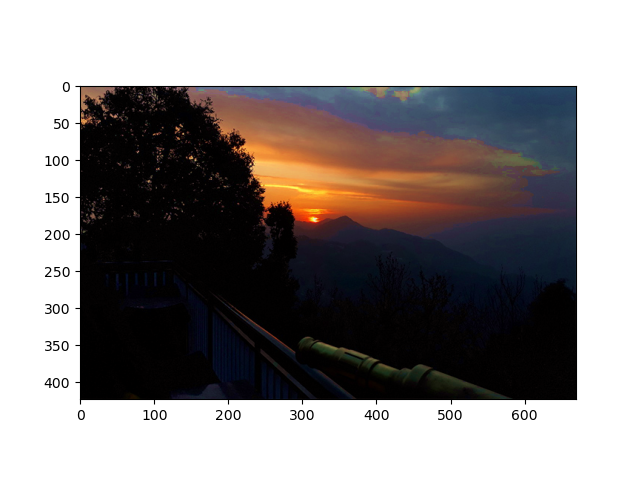

In [33]:
#Color value refers to the relative lightness or darkness of a color. 
# Note that you want the values to map between the range defined by the imported library 
#(in OpenCv 0-255), so you shouldn't just add or multiply with some constant


def change_s(img, val):
    #img_hsv = cv2.cvtColor(im_origin, cv2.COLOR_RGB2HSV)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    #do sth to s
    #cv2.inrange
    
    
    s = cv2.add(s, val)
    
    s[s< 0] = 0
    s[s>255] = 255


    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img



img = cv2.imread('./img/part2/img2_1.jpg')
original = img[:, :, [2,1,0]]
plt.figure()
plt.imshow(original, norm=LogNorm(1, 30))
# plt.savefig('./img/part2/2_2im_origin')



img = change_s(img, 70) #increases
img = img[:, :, [2,1,0]]
plt.figure()
plt.imshow(img, norm=LogNorm(1, 30))
# plt.savefig('./img/part2/2_2color_enhance')



#### Color shift

<IPython.core.display.Javascript object>


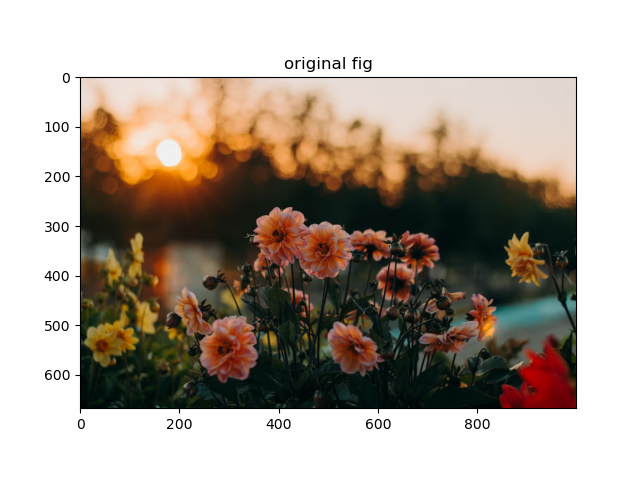

<IPython.core.display.Javascript object>


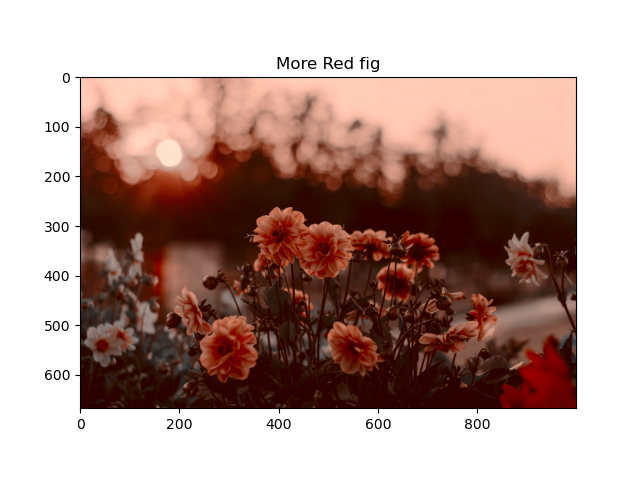

<IPython.core.display.Javascript object>


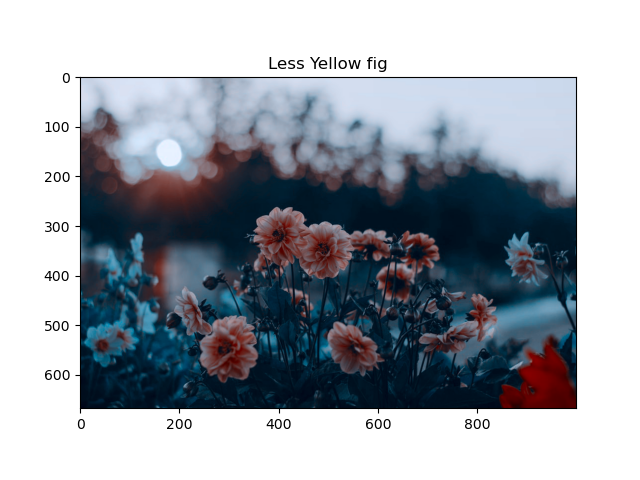

In [37]:
# Take an image of your choice and create two color-modified 
# versions that are (a) more red; (b) less yellow.

#In OpenCv use cv2.cvtColor(image, cv2.COLOR_BGR2Lab)


# L – Lightness ( Intensity ).
# a – color component ranging from Green to Red.
# b – color component ranging from Blue to Yellow.

def colorShift(img,valRed, valYellow):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

#     plt.imshow(lab, norm=LogNorm(1, 30))
    l,a,b=cv2.split(lab)
    #increase a, more res?
    a = cv2.add(a, valRed)

    #decrease b, less yellow?
    b = cv2.add(a,valYellow)
#     b[b< -127] = 127
#     b[b>128] = 128
    final_lab = cv2.merge((l, a, b))
    img = cv2.cvtColor(final_lab, cv2.COLOR_LAB2BGR)
    img = img[:, :, [2,1,0]]
    return img
    




img = cv2.imread('./img/part2/part2_2.jpeg')
img = img[:, :, [2,1,0]]
plt.figure()
plt.title('original fig')
plt.imshow(img, norm=LogNorm(1, 30))



img_moreRed = colorShift(img,20,0)
plt.figure()
plt.title('More Red fig')
plt.imshow(img_moreRed, norm=LogNorm(1, 30))
plt.savefig('./img/part2/moreRed') 

img_lessYellow = colorShift(img,0,-10)
plt.figure()
plt.title('Less Yellow fig')
plt.imshow(img_lessYellow, norm=LogNorm(1, 30))
plt.savefig('./img/part2/lessYellow') 



### Part III: B & W

#### Enhance the hybrid img

<IPython.core.display.Javascript object>


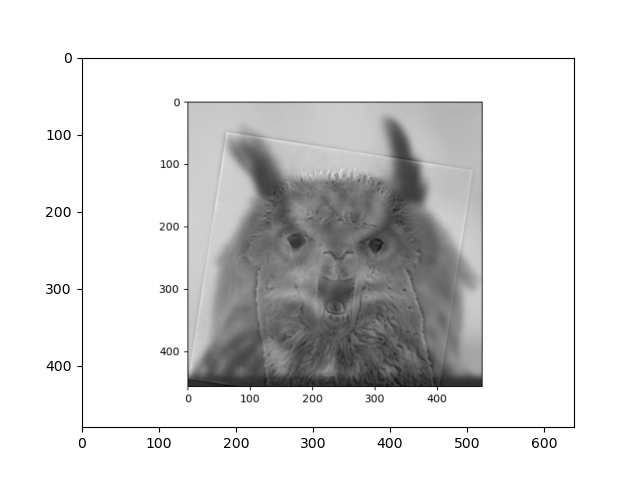

In [62]:
#Try using color to enhance the effect of hybrid images. 
# Does it work better to use color for the high-frequency component, 
# the low-frequency component, or both? (5 pts)

p3img = cv2.imread('./img/set1/res.png')
# plt.figure()
# plt.imshow(p3img)

newimg = change_s(p3img, 0)
newimg = newimg[:, :, [2,1,0]]
plt.figure()
plt.imshow(newimg, norm=LogNorm(1, 30))

#### Gaussian and Laplacian pyramids

<IPython.core.display.Javascript object>


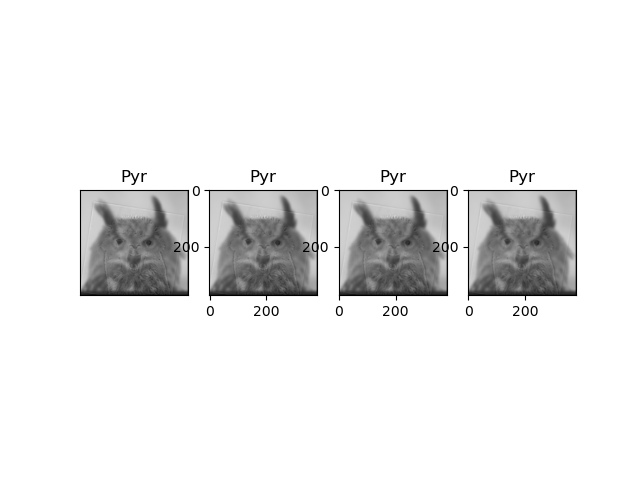

In [95]:
# Illustrate the hybrid image process by implementing Gaussian and
# Laplacian pyramids and displaying them for your favorite result.
# This should look similar to Figure 7
# in the Oliva et al. paper. (15 pts)
img = cv2.imread('./img/part3/p3_pyr.png')

gFilter = Filter_cutlow = getGaussian(1)


# plt.figure()
# plt.imshow(img, norm=LogNorm(1, 30))

fig, axes = plt.subplots(1, 4)


for x in range(4):
    img = cv2.filter2D(img, -1, gFilter)
    small_img = cv2.resize(img, # original image
                           None, # set fx and fy, not the final size
                           fx=0.5, 
                           fy=0.5, 
                           interpolation=cv2.INTER_CUBIC)
    plt.figure()
    plt.imshow(small_img, norm=LogNorm(1, 30))
#     axes[x].imshow(small_img,cmap='gray')
#     axes[x].set_title('Pyr'), axes[0].set_xticks([]), axes[0].set_yticks([])


    



# lower_reso = cv2.pyrDown(img)
# plt.figure()
# plt.imshow(lower_reso, norm=LogNorm(1, 30))

